The goal here is to evaluate the errors introduced adversarial training by a bit-wise comparison of the original weight values with the modified values.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
orig_weights = np.load('original_weights.npy')
modified_weights = np.load('modified_weights.npy')

In [3]:
def compute_minAndMax(list_arrays):
    '''
    Function to find the smallest and largest elements 
    in a list of numpy arrays
    '''
    min_val = np.inf
    max_val = -np.inf
    for arr in list_arrays:
        if arr.min() < min_val:
            min_val = arr.min()
        if arr.max() > max_val:
            max_val = arr.max()
    return min_val, max_val

In [4]:
def compute_scalingFunction(list_weightArrays, N) :
    """
    returns a function which scales the value to range 0-N,
    and is given by :
                N * (x - min)
        f(x) = ---------------
                  max - min
    """
    min_val, max_val = compute_minAndMax(list_weightArrays)
    print(min_val, max_val)
    return lambda x : N * (x - min_val)/(max_val - min_val)

In [5]:
def scale_weights(list_weightArrays, scale_func, N):
    """
    scale the weight values so that they are integers
    which can be manipulated with bitwise operators
    """
    list_scaledWeightArrays = []
    for arr in list_weightArrays:
        scaledArray = scale_func(arr)
        list_scaledWeightArrays.append(scaledArray.astype(int))
    return list_scaledWeightArrays

In [6]:
def compute_bitErrorRate(list_origWeights, list_modifiedWeights, N):
    '''
    scales the values to range 0-N, then computes the xor for each pair of values
    '''
    # We need to consider both the original weights as well as the modified 
    # weights while finding the minimum and maximum element, so that the 
    # computed range encompasses all the weight values.
    list_weightArrays = list_origWeights + list_modifiedWeights
    scale_func = compute_scalingFunction(list_weightArrays, N)
    scaled_origWeights = scale_weights(list_origWeights, scale_func, N)
    scaled_modifiedWeights = scale_weights(list_modifiedWeights, scale_func, N)
    list_bitErrorRates = []
    for orig_arr, modified_arr in zip(scaled_origWeights, scaled_modifiedWeights):
        # error_arr is the element-wise xor of all values in the array
        error_arr = orig_arr ^ modified_arr
        list_bitErrorRates.append(error_arr)
    return list_bitErrorRates

In [8]:
def measure_noise(orig_values, modified_values):
    list_noiseValues = []
    for orig_arr, modified_arr in zip(orig_values, modified_values):
        # error_arr is the element-wise difference of all values in the array
        error_arr = orig_arr - modified_arr
        list_noiseValues.append(error_arr)
    return list_noiseValues
adversarialNoise = measure_noise(orig_weights, modified_weights)
compute_minAndMax(adversarialNoise)

(-0.0020616278, 0.0020405427)

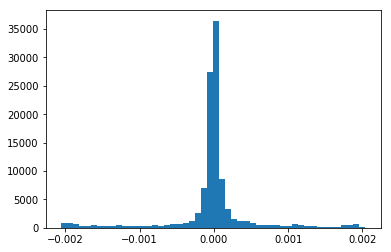

In [10]:
# Need to store as an array of arrays for plotting the values, a list
# is not flexible enough
# Compare the adversarial noise with random gaussian noise
flattened_adversarialNoise = np.array([])
for arr in adversarialNoise:
    flattened_adversarialNoise = np.append(flattened_adversarialNoise, np.reshape(arr, (-1,)))
plt.hist(flattened_adversarialNoise[flattened_adversarialNoise != 0], 50)
plt.show()